# DSC 680- Project 1
## YouTube Engagement Analysis
### Allison Biediger
***

#### Importing Data Set

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("all_youtube_analytics.csv")

In [48]:
df.head()

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  float64
 12  averageViewDurat

(234889, 29)

***
#### Exploring the Data and Visualization Creation

In [54]:
# Remove rows where views are zero
df = df[df['views'] > 0]  
df = df[(df['likes'] >= 0) & (df['comments'] >= 0) & (df['shares'] >= 0)]  # Filter out negative values

In [56]:
top_videos = df.nlargest(10, 'views')
print(top_videos[['video_id', 'views', 'likes', 'comments']])

           video_id   views  likes  comments
174271  A-OTZ3uYQ7Y  8818.0   60.0       0.0
174039  A-OTZ3uYQ7Y  8514.0   61.0       0.0
177329  A-OTZ3uYQ7Y  8211.0   67.0       0.0
193810  A-OTZ3uYQ7Y  7834.0   49.0       1.0
193655  A-OTZ3uYQ7Y  7813.0   44.0       0.0
172910  A-OTZ3uYQ7Y  7704.0   45.0       0.0
174803  A-OTZ3uYQ7Y  7699.0   51.0       0.0
178688  A-OTZ3uYQ7Y  7494.0   60.0       0.0
182085  A-OTZ3uYQ7Y  7416.0   29.0       0.0
194294  A-OTZ3uYQ7Y  7380.0   45.0       0.0


In [60]:
df = df[df['views'] > 0].copy() 
df['engagement_score'] = (df['likes'] + df['comments'] + df['shares']) / df['views']


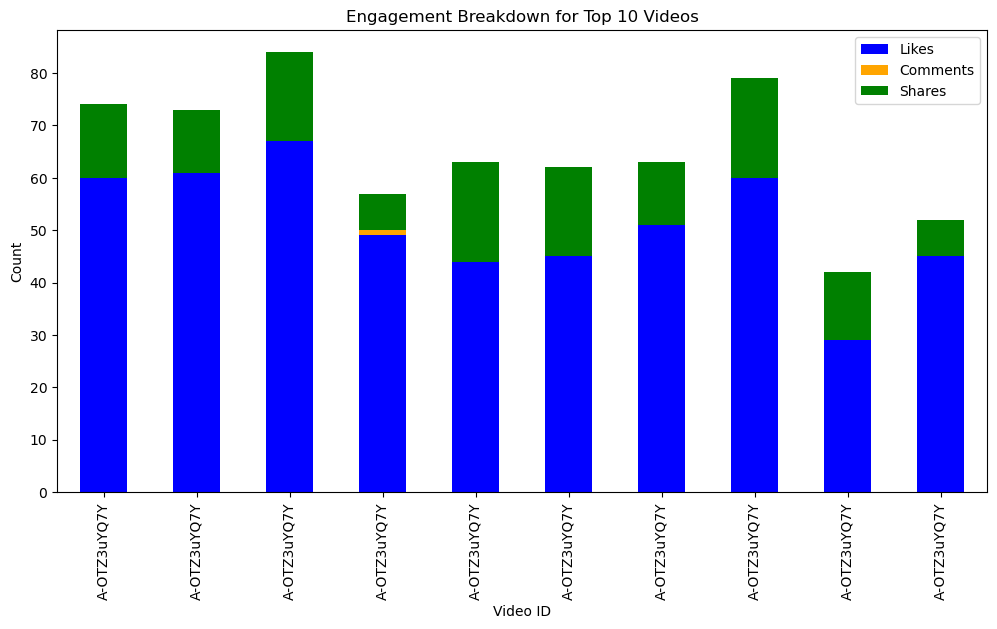

In [62]:
# Prepare data
top_videos = df.nlargest(10, 'views')[['video_id', 'likes', 'comments', 'shares']].set_index('video_id')

# Plot
top_videos.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange', 'green'])
plt.title('Engagement Breakdown for Top 10 Videos')
plt.xlabel('Video ID')
plt.ylabel('Count')
plt.legend(['Likes', 'Comments', 'Shares'])
plt.show()

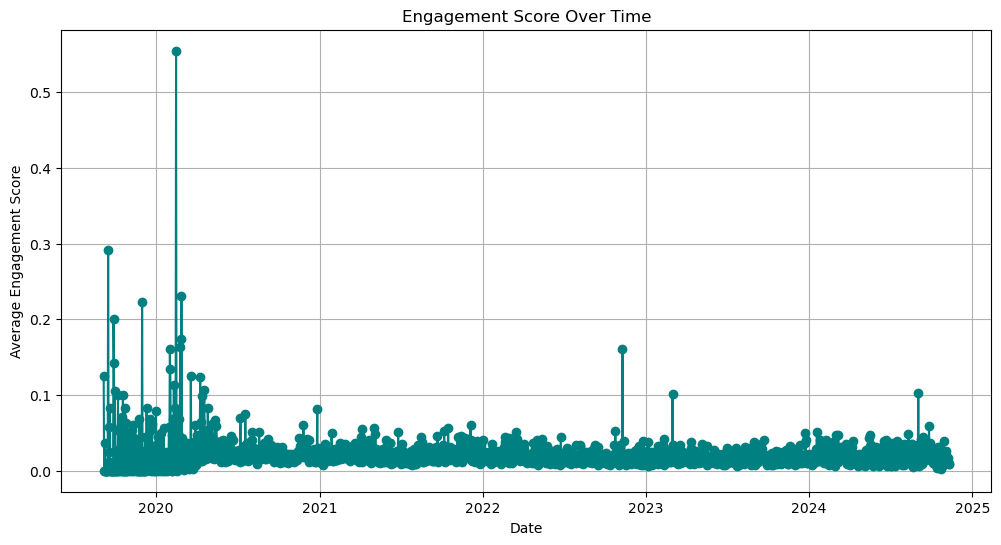

In [64]:
# Convert 'day' to datetime
df['day'] = pd.to_datetime(df['day'])

# Group by date and calculate mean engagement score
engagement_over_time = df.groupby('day')['engagement_score'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(engagement_over_time.index, engagement_over_time.values, marker='o', linestyle='-', color='teal')
plt.title('Engagement Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Engagement Score')
plt.grid()
plt.show()


In [66]:
# Display the list
print("Top 10 Videos by Engagement Score:")
top_engagement = df[['video_id', 'engagement_score']].sort_values('engagement_score', ascending=False).head(10)
print(top_engagement)

Top 10 Videos by Engagement Score:
           video_id  engagement_score
31845   T0U1D4MIWA0               3.0
4717    aLYVxdJEKQ0               3.0
186368  pSS4iRo-Xks               3.0
123423  hpYE3SQonmk               3.0
209435  vL53Q0OV6l0               2.5
37050   fXFeTabc_rM               2.0
110748  NuJAK6ACU0s               2.0
108205  YBocj6P0-yo               2.0
187004  pSS4iRo-Xks               2.0
23349   V1YwVETqB2c               2.0


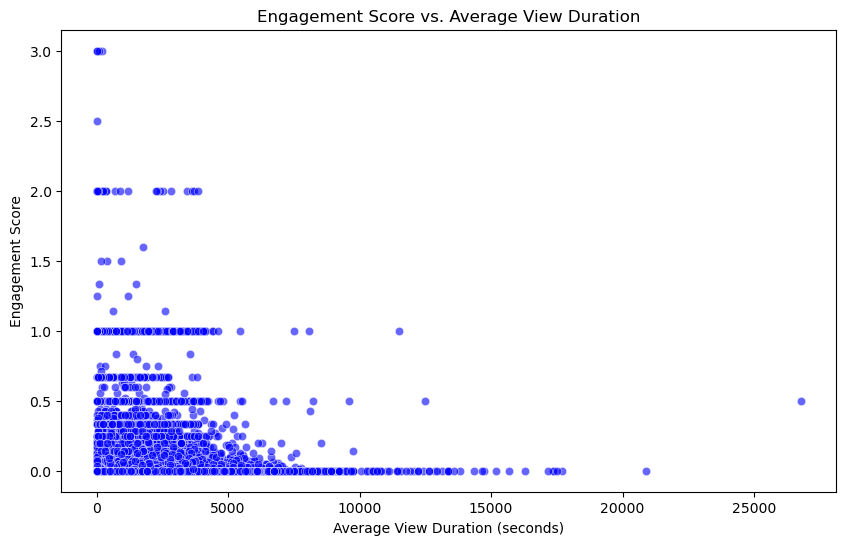

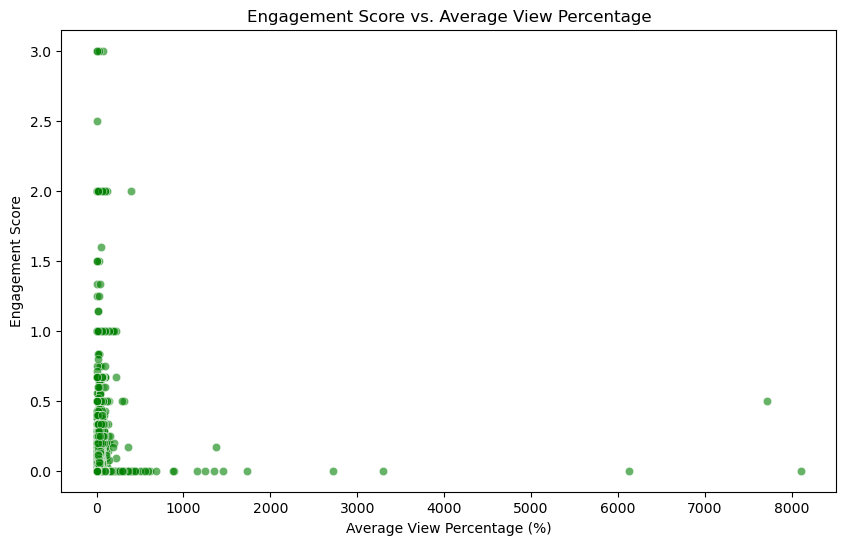

In [70]:
import seaborn as sns

# Scatter plot: Engagement Score vs. Average View Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='averageViewDuration', y='engagement_score', alpha=0.6, color='blue')
plt.title('Engagement Score vs. Average View Duration')
plt.xlabel('Average View Duration (seconds)')
plt.ylabel('Engagement Score')
plt.show()

# Scatter plot: Engagement Score vs. Average View Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='averageViewPercentage', y='engagement_score', alpha=0.6, color='green')
plt.title('Engagement Score vs. Average View Percentage')
plt.xlabel('Average View Percentage (%)')
plt.ylabel('Engagement Score')
plt.show()


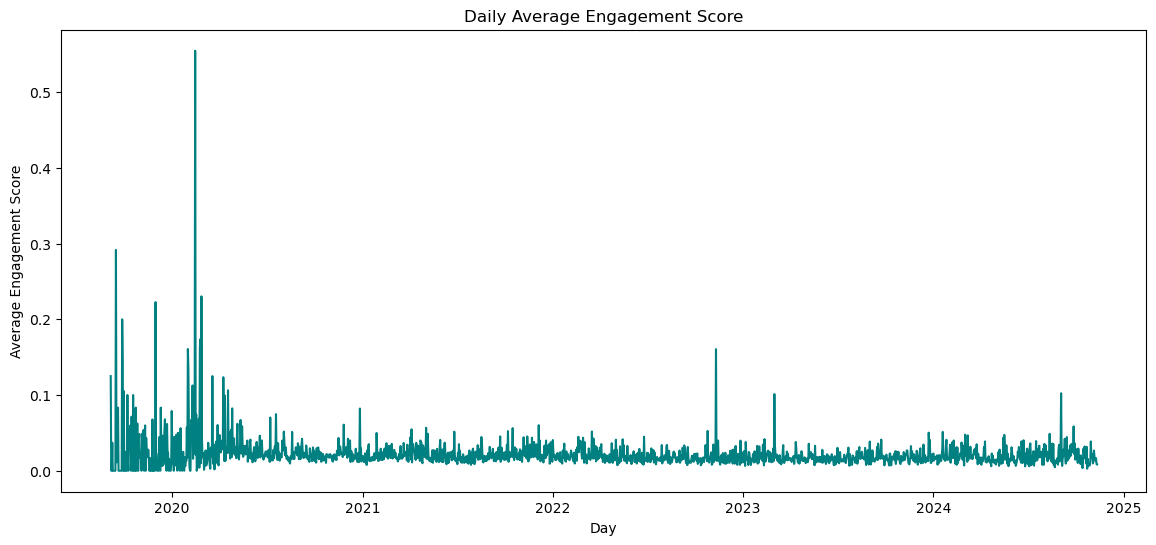

In [72]:
# Convert 'day' to datetime
df['day'] = pd.to_datetime(df['day'])

# Group by day and calculate average engagement score
daily_engagement = df.groupby('day')['engagement_score'].mean().reset_index()

# Plot time-series
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_engagement, x='day', y='engagement_score', color='teal')
plt.title('Daily Average Engagement Score')
plt.xlabel('Day')
plt.ylabel('Average Engagement Score')
plt.show()


***
#### Model Selection and Training

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Drop any rows with missing values
df_clean = df.dropna(subset=['engagement_score'])

# Define the feature columns
features = ['likes', 'comments', 'shares', 'averageViewDuration', 'averageViewPercentage', 
            'videosAddedToPlaylists', 'videosRemovedFromPlaylists', 'estimatedMinutesWatched']

# Define the target variable
target = 'engagement_score'

# Split the data into features (X) and target (y)
X = df_clean[features]
y = df_clean[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 0.00037403774434397526
Root Mean Squared Error: 0.019340055437975748
R-Squared: 0.9362926358773016


C:\Users\Allie\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


***
#### Feature Importance Analysis

In [80]:
# Get the feature importances from the trained model
importances = rf_model.feature_importances_

# Get the feature names
features = X.columns

# Create a DataFrame with feature names and their corresponding importance values
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)


                      Feature  Importance
7     estimatedMinutesWatched    0.593415
3         averageViewDuration    0.143547
2                      shares    0.116037
0                       likes    0.095454
4       averageViewPercentage    0.025602
1                    comments    0.022991
5      videosAddedToPlaylists    0.002115
6  videosRemovedFromPlaylists    0.000838
